In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score


In [14]:

data = pd.read_csv("C:/Users/Samuel Raj/Downloads/you.tube.csv")
data

channel_name  \
0                                        Lokdhun Punjabi   
1                                                HJ NEWS   
2                                                   TFPC   
3                                            Eruma Saani   
4                                             Filmylooks   
...                                                  ...   
99994  Adda247 :Official Channel of BankersAdda & SSC...   
99995                                         First Show   
99996                                         Mahathalli   
99997                                        Kangra Boys   
99998                                  News 18 Tamilnadu   

                                                   title    Location  \
0      Sharry Mann: Cute Munda ( Song Teaser) | Parmi...      Punjab   
1      पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...     Myanmar   
2      Stylish Star Allu Arjun @ ChaySam Wedding Rece...   Telangana   
3                         Eruma Saani | Tamil vs English  Tamil Nadu   
4      why Samantha became EMOTIONAL @ Samantha naga ...   Telangana   
...                                                  ...         ...   
99994  CURRENT AFFAIRS | THE HINDU | 28th May 2018 | ...   Karnataka   
99995  കാമുകന്റെ ലൈംഗിക സുഖത്തിന് വേണ്ടി യുവതി കാണിച്...      Kerala   
99996     Types of Singers in Anthyakshari || Mahathalli   Telangana   
99997  '' बाबे दा '' CRAZE IN HIMACHAL (PART-2) ||FUN...  Tamil Nadu   
99998  தூத்துக்குடியில் துப்பாக்கிச் சூடு நடந்தது ஏன்...  Tamil Nadu   

      trending_date  category_id              publish_time  \
0          17.14.11            1  2017-11-12T12:20:39.000Z   
1          17.14.11           25  2017-11-13T05:43:56.000Z   
2          17.14.11           24  2017-11-12T15:48:08.000Z   
3          17.14.11           23  2017-11-12T07:08:48.000Z   
4          17.14.11           24  2017-11-13T01:14:16.000Z   
...             ...          ...                       ...   
99994      18.28.05           27  2018-05-28T03:23:01.000Z   
99995      18.28.05           24  2018-05-24T14:16:29.000Z   
99996      18.28.05           24  2018-05-26T12:21:13.000Z   
99997      18.28.05           23  2018-05-26T13:06:16.000Z   
99998      18.28.05           25  2018-05-25T09:42:34.000Z   

                                                    tags    views  likes  \
0      sharry mann|"sharry mann new song"|"sharry man...  1096327  33966   
1      पीरियड्स के समय|"पेट पर पति करता ऐसा"|"देखकर द...   590101    735   
2      Stylish Star Allu Arjun @ ChaySam Wedding Rece...   473988   2011   
3      Eruma Saani|"Tamil Comedy Videos"|"Films"|"Mov...  1242680  70353   
4      Filmylooks|"latest news"|"telugu movies"|"telu...   464015    492   
...                                                  ...      ...    ...   
99994                                             [none]    20178   2454   
99995  film news|"movie news"|"movie gossips"|"mollyw...   877230      0   
99996  telugu comedy videos|"telugu funny videos"|"te...   272316   4454   
99997  Amit badana round 2 hell elvish yadav harsh be...   105495   8258   
99998  News 18 Tamil Nadu|"நியூஸ்18 தமிழ்நாடு"|"Tamil...   238030   1342   

       dislikes  comment_count  comments_disabled  ratings_disabled  \
0           798            882              False             False   
1           904              0               True             False   
2           243            149              False             False   
3          1624           2684              False             False   
4           293             66              False             False   
...         ...            ...                ...               ...   
99994        70             47              False             False   
99995         0            320              False              True   
99996       515            915              False             False   
99997       237            863              False             False   
99998       248    

In [16]:
data = data.dropna()
data.isnull().sum()

channel_name              0
title                     0
Location                  0
trending_date             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
dtype: int64

In [17]:
data = pd.DataFrame(data)
data.shape[0],data.shape[1]

(98338, 14)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98338 entries, 0 to 99998
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   channel_name            98338 non-null  object
 1   title                   98338 non-null  object
 2   Location                98338 non-null  object
 3   trending_date           98338 non-null  object
 4   category_id             98338 non-null  int64 
 5   publish_time            98338 non-null  object
 6   tags                    98338 non-null  object
 7   views                   98338 non-null  int64 
 8   likes                   98338 non-null  int64 
 9   dislikes                98338 non-null  int64 
 10  comment_count           98338 non-null  int64 
 11  comments_disabled       98338 non-null  bool  
 12  ratings_disabled        98338 non-null  bool  
 13  video_error_or_removed  98338 non-null  bool  
dtypes: bool(3), int64(5), object(6)
memory usage: 9.3+ MB


In [24]:
data[['views', 'likes', 'dislikes', 'comment_count','category_id']].describe()

views         likes      dislikes  comment_count   category_id
count  9.833800e+04  9.833800e+04  9.833800e+04   98338.000000  98338.000000
mean   1.063719e+06  2.656298e+04  1.511289e+03    2569.200014     21.670382
std    3.162396e+06  9.966134e+04  1.065060e+04   12682.028250      6.419541
min    4.024000e+03  0.000000e+00  0.000000e+00       0.000000      1.000000
25%    1.178220e+05  8.000000e+02  9.900000e+01      72.000000     23.000000
50%    2.984730e+05  2.847000e+03  3.090000e+02     304.000000     24.000000
75%    8.015525e+05  1.311900e+04  1.002000e+03    1244.000000     24.000000
max    1.254322e+08  2.912710e+06  1.545017e+06  827755.000000     43.000000

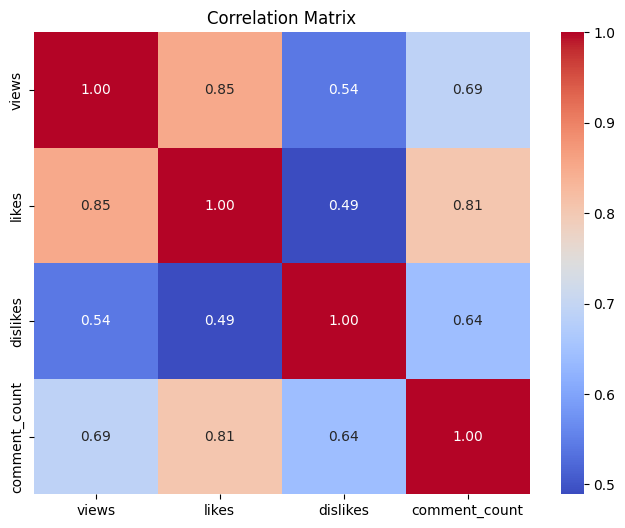

In [25]:
correlation_matrix = data[['views', 'likes', 'dislikes', 'comment_count']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show();

In [27]:

features = ['likes', 'dislikes', 'comment_count', 'category_id']
target = 'views'

X = data[features]
y = data[target]

In [28]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [30]:
y_pred = model.predict(X_test)
Accuracy = r2_score(y_test, y_pred)
Accuracy*100


98.7304390847369

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train a Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Linear Regression MSE: {mse_linear}")
print(f"Linear Regression R2: {r2_linear}")


Linear Regression MSE: 2707932436000.164
Linear Regression R2: 0.7539630462658791
